## Experiment Overview

```
The mean value of each channel is subtracted for each pixel.

...

The face descriptor is extracted from the layer adjacent to the classifier layer. This leads to a 2048 dimensional descriptor, which is then L2 normalised. 

...

the template vector is obtained by averaging the face descriptors of the images. Cosine similarity is used to represent the similarity between two templates.

```

In [ ]:
from bias_exp import build_df, build_batchmaker, make_features, get_nns, view_all_imgs

df = build_df('./ids/')
batch_maker = build_batchmaker(df)
templates = make_features(df, batch_maker, save=False)
df = get_nns(df)

from bias_exp import filter_by_nn

df1 = filter_by_nn(df)

from bias_exp import perform_experiment, sample_by_subgroups, plot_history

df1.to_csv('first_experiment_labels.csv', index=False)
history = []
for i in range(100):
    sampled = sample_by_subgroups(df1, seed=i, n_class=2000)
    history += perform_experiment(sampled, batch_maker, ticker=i)
    plot_history([history[-1]], ticker=i)

Using TensorFlow backend.


got color channel values:
152.00993110790063 116.37548051946683 99.61494822309866
indexing...
done!
building trees...
done!
saving to:  annoy_tree.ann
populating nearest neighbors values...
done!
4366  under 20
11242  20-39
7301  above 40
2000
4366  under 20
11242  20-39
7301  above 40
2000
4366  under 20
11242  20-39
7301  above 40
2000
4366  under 20
11242  20-39
7301  above 40
2000
4366  under 20
11242  20-39
7301  above 40
2000
4366  under 20
11242  20-39
7301  above 40
2000
4366  under 20
11242  20-39
7301  above 40
2000
4366  under 20
11242  20-39
7301  above 40
2000
4366  under 20
11242  20-39
7301  above 40
2000
4366  under 20
11242  20-39
7301  above 40
2000
4366  under 20
11242  20-39
7301  above 40
2000
4366  under 20
11242  20-39
7301  above 40
2000
4366  under 20
11242  20-39
7301  above 40
2000
4366  under 20
11242  20-39
7301  above 40
2000
4366  under 20
11242  20-39
7301  above 40
2000
4366  under 20
11242  20-39
7301  above 40
2000
4366  under 20
11242  20-39
7301  ab

In [2]:
from bias_exp import sample_by_subgroups, perform_experiment

df1.to_csv('first_experiment_labels.csv', index=False)
history = []
for i in range(100):
    sampled = sample_by_subgroups(df1, seed=i)
    history += perform_experiment(sampled, batch_maker, ticker=i)

ImportError: cannot import name 'sample_by_subgroups'

In [8]:
from bias_exp import sample_by_subgroups, perform_experiment, datagen
from keras.models import load_model
import pandas as pd
import numpy as np


def record_results(df, modelpath, test_gen, class_coder, steps, ticker='test', results_path='./results.csv'):
    """Takes the modelpath, loads the model, runs tests,
    and records results.
    """
    best_model = load_model(modelpath)
    try:
        results = pd.read_csv('./results.csv')
    except FileNotFoundError:
        results = pd.DataFrame(columns=['gt_id', 'pred_id'])
    test_data = []
    for i in range(steps+1):
        test_data.append(next(test_gen))

    new_results = pd.DataFrame(columns=['class', 'pred'])
    for dt in test_data:
        pred = best_model.predict(dt[0])
        Y = dt[1]
        chunk = pd.DataFrame(columns=results.columns)
        chunk['class'] = np.argmax(Y, axis=1)
        chunk['pred'] = np.argmax(pred, axis=1)
        new_results = pd.concat([new_results, chunk], axis=0, sort=True)

    gt_ids = []
    pred_ids = []
    for i, row in new_results.iterrows():
        gt = row['class']
        gt_label = class_coder[gt]
        gt_ids.append(gt_label)
        prediction = row['pred']
        pred_label = class_coder[prediction]
        pred_ids.append(pred_label)
        
    record = pd.DataFrame(columns=['gt_id', 'pred_id'])
    record['gt_id'] = gt_ids
    record['pred_id'] = pred_ids

    record = record.drop_duplicates()
    
    results = pd.concat([results, record], axis=0, sort=True)
    results.to_csv('./results.csv', index=False)
    return results

batch_size=64
n_class = len(sampled)
steps = n_class//batch_size
ticker='test'

val_gen = datagen(sampled, batch_maker, batch_size=batch_size, train=False)
class_coder = next(val_gen)

results = record_results(sampled, 'model.h5', val_gen, class_coder, steps, ticker)
results.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



got ground truth 0 belongs to uQ5vA
got prediction 1184 belongs to FaocJ
got ground truth 1 belongs to nggQe
got prediction 1569 belongs to B0OzR
got ground truth 2 belongs to MyaQ1
got prediction 2 belongs to MyaQ1
got ground truth 3 belongs to 9lR2F
got prediction 259 belongs to 4cHo1
got ground truth 4 belongs to 298cy
got prediction 1696 belongs to MkNAG
got ground truth 5 belongs to 0y50C
got prediction 2166 belongs to 5QPAk
got ground truth 6 belongs to nyA80
got prediction 1404 belongs to pGPGZ
got ground truth 7 belongs to wFLhR
got prediction 66 belongs to bu3fR
got ground truth 8 belongs to F6EQG
got prediction 8 belongs to F6EQG
got ground truth 9 belongs to 0xrhm
got prediction 67 belongs to rcCN6
got ground truth 10 belongs to CRivY
got prediction 641 belongs to rT413
got ground truth 11 belongs to vkUHU
got prediction 1277 belongs to eIic2
got ground truth 12 belongs to VYb2B
got prediction 56 belongs to Ds8CY
got ground truth 13 belongs to vLJih
got prediction 13 belongs

got prediction 1962 belongs to MI9Lq
got ground truth 607 belongs to XTUjK
got prediction 1639 belongs to xzZVu
got ground truth 608 belongs to qGG1X
got prediction 1909 belongs to 99Aqs
got ground truth 609 belongs to i07DN
got prediction 1728 belongs to 6udAc
got ground truth 610 belongs to czNhP
got prediction 385 belongs to cHEGL
got ground truth 611 belongs to ToFLg
got prediction 625 belongs to 4oAyD
got ground truth 612 belongs to Hcml2
got prediction 449 belongs to nGeVP
got ground truth 613 belongs to 9Y4Sr
got prediction 2148 belongs to bjmNL
got ground truth 614 belongs to 15oc8
got prediction 614 belongs to 15oc8
got ground truth 615 belongs to vKJ3J
got prediction 615 belongs to vKJ3J
got ground truth 616 belongs to U0nFH
got prediction 1105 belongs to 0v6Fc
got ground truth 617 belongs to E4bxZ
got prediction 1038 belongs to 1BLlm
got ground truth 618 belongs to MLFn5
got prediction 674 belongs to v3D6L
got ground truth 619 belongs to t3DXu
got prediction 590 belongs to J

got ground truth 1106 belongs to q0wfC
got prediction 1849 belongs to PPPOY
got ground truth 1107 belongs to TEMK6
got prediction 678 belongs to rmPuf
got ground truth 1108 belongs to piHhW
got prediction 1108 belongs to piHhW
got ground truth 1109 belongs to 6la1O
got prediction 1109 belongs to 6la1O
got ground truth 1110 belongs to BKoUG
got prediction 1188 belongs to VBBFD
got ground truth 1111 belongs to myW9Y
got prediction 1440 belongs to lPdpE
got ground truth 1112 belongs to q3A0a
got prediction 1254 belongs to yEnLW
got ground truth 1113 belongs to kXCTz
got prediction 1060 belongs to A8Eih
got ground truth 1114 belongs to U3kqw
got prediction 1805 belongs to 3p0tL
got ground truth 1115 belongs to papy1
got prediction 1115 belongs to papy1
got ground truth 1116 belongs to OKqOo
got prediction 2318 belongs to 1k5ca
got ground truth 1117 belongs to VWHeg
got prediction 2349 belongs to 6NFbs
got ground truth 1118 belongs to odwEB
got prediction 1118 belongs to odwEB
got ground tr

got prediction 2233 belongs to r88w7
got ground truth 1796 belongs to ZpLrZ
got prediction 590 belongs to JE528
got ground truth 1797 belongs to E25mN
got prediction 364 belongs to 2Nv76
got ground truth 1798 belongs to ETsDO
got prediction 261 belongs to mfyMm
got ground truth 1799 belongs to B8aT1
got prediction 153 belongs to LxEj5
got ground truth 1800 belongs to zk9PB
got prediction 293 belongs to MzG9X
got ground truth 1801 belongs to xfZPi
got prediction 1814 belongs to 9IkEV
got ground truth 1802 belongs to K76qf
got prediction 1802 belongs to K76qf
got ground truth 1803 belongs to MwjxS
got prediction 60 belongs to n2gge
got ground truth 1804 belongs to XJyHf
got prediction 625 belongs to 4oAyD
got ground truth 1805 belongs to 3p0tL
got prediction 1805 belongs to 3p0tL
got ground truth 1806 belongs to oAaM5
got prediction 505 belongs to VOKZM
got ground truth 1807 belongs to sN9fv
got prediction 1814 belongs to 9IkEV
got ground truth 1808 belongs to 6C0x0
got prediction 830 be

got prediction 2208 belongs to yYHy6
got ground truth 2268 belongs to eM9GS
got prediction 953 belongs to bsnHv
got ground truth 2269 belongs to gMo4o
got prediction 2229 belongs to BhNDJ
got ground truth 2270 belongs to Y5FZx
got prediction 2188 belongs to TgABH
got ground truth 2271 belongs to 856Ky
got prediction 2557 belongs to FjwKJ
got ground truth 2272 belongs to 6TFnI
got prediction 2272 belongs to 6TFnI
got ground truth 2273 belongs to CLWaN
got prediction 1521 belongs to hY6aW
got ground truth 2274 belongs to GiekG
got prediction 1975 belongs to locbh
got ground truth 2275 belongs to 9HBRh
got prediction 1368 belongs to mDiQR
got ground truth 2276 belongs to CX00w
got prediction 2356 belongs to CDgch
got ground truth 2277 belongs to 5VTw9
got prediction 2352 belongs to TK5C2
got ground truth 2278 belongs to J8f1z
got prediction 2278 belongs to J8f1z
got ground truth 2279 belongs to tVcHz
got prediction 2279 belongs to tVcHz
got ground truth 2280 belongs to Rixzt
got predictio

,gt_id,pred_id
0,uQ5vA,FaocJ
1,nggQe,B0OzR
2,MyaQ1,MyaQ1
3,9lR2F,4cHo1
4,298cy,MkNAG


In [18]:
results.head()

,class,pred,gt_id,pred_id
0,1815,1815,NaN,NaN
1,1816,1816,NaN,NaN
2,1817,1817,NaN,NaN
3,1818,1818,NaN,NaN
4,1819,1819,NaN,NaN


In [ ]:
def record_results()

best_model = load_model(modelpath)
test_data = []
for i in range(steps+1):
    test_data.append(next(val_gen))

results = pd.DataFrame(columns=['class', 'pred'])
for dt in test_data:
    X = best_model.predict(dt[0])
    Y = dt[1]
    chunk = pd.DataFrame(columns=results.columns)
    chunk['class'] = np.argmax(Y, axis=1)
    chunk['pred'] = np.argmax(X, axis=1)
    results = pd.concat([results, chunk], axis=0)
    
results = results.drop_duplicates()

results = record_results(modelpath, test_gen)

In [4]:
from bias_exp import flip
from PIL.ImageEnhance import Brightness, Color, Sharpness, Contrast
from keras.models import load_model, Model
from keras.layers import Flatten, Input, Dense
from random import shuffle

class_coder = dict()
for i, row in sampled.iterrows():
    class_coder[row.id] = i
    class_coder[i] = row.id

def make_image_batch(df, mem, train=False, df=sngls, class_coder=class_coder, batch_maker=batch_maker):
    """Produces a batch with original images for
    full-model fine tuning"""
    pull_dir = './ids/'
    slc = df[df.unique_id.isin(ids)]
    ids = df.id.values
    X = []
    Y = []
    for i, id_ in enumerate(ids):
        filename = pull_dir + id_ + '.jpg.chip.jpg'
        try:
            img = mem[filename]
        except KeyError:
            try:
                img = Image.open(filename)
                mem[filename] = img
            except FileNotFoundError:
                print('file not found: {}'.format(filename))
                print('skipping...')
                continue
        #mirror image for evaluation
        if not train:
            img = flip(img)
        elif train:
            img = augment(img)
        X.append(np.array(img))
        class_code = class_coder[id_ref[i]]
        one_hot = one_hot_encode(class_code)
        one_hot = np.expand_dims(one_hot, axis=0)
        Y.append(one_hot)
        
    X = batch_maker.make_batch(X)
    Y = np.concatenate(Y, axis=0)
    return X, Y, mem

    
def one_hot_encode(cls):
    """One-hot encodes an input class."""
    result = np.zeros(len(classes))
    result[cls] = 1
    return result


def batch_gen(class_list, batch_func=make_batch, batch_size=10, train=False, do_shuffle=False):
    """Generates batches for training and validation"""
    n_passes = 0
    batch = []
    mem = dict()
    while True:
        n_passes += 1
        classes = class_list.copy()
        if do_shuffle:
            shuffle(classes)
        for cls in classes:
            batch.append(cls)
            if len(batch) == batch_size:
                X, Y, mem = batch_func(batch, mem, train=train)
                yield X, Y
                batch = []
                
def plot_history(hst):
    """Makes plot from training history"""
    val_loss = np.array([])
    loss = np.array([])
    val_acc = np.array([])
    acc = np.array([])
    for history in hst:
        val_loss = np.concatenate([val_loss, history.history['val_loss']])
        loss = np.concatenate([loss, history.history['loss']])
        val_acc = np.concatenate([val_acc, history.history['val_acc']])
        acc = np.concatenate([acc, history.history['acc']])
    plt.plot(val_loss, label='val loss')
    plt.plot(loss, label='train loss')
    plt.title('loss optimization')
    plt.legend()
    plt.show()
    plt.plot(val_acc, label='val accuracy')
    plt.plot(acc, label='train accuracy')
    plt.title('accuracy optimization')
    plt.legend()
    plt.show()
    
class IpynbPlotter(Callback):
    """Plots optimization progress at each epoch end."""
    
    def __init__(self):
        self.loss = []
        self.vloss = []
        self.acc = []
        self.vacc = []
        self.history = dict()
        self.history['val_loss'] = self.vloss
        self.history['loss'] = self.loss
        self.history['val_acc'] = self.vacc
        self.history['acc'] = self.acc
        super().__init__()
    
    def on_epoch_end(self, epoch, logs={}):
        self.loss.append(logs['loss'])
        self.vloss.append(logs['val_loss'])
        self.acc.append(logs['acc'])
        self.vacc.append(logs['val_acc'])
        clear_output()
        plot_history([self])
        return
    
    
def augment(img):
    """Performs augmentation on input image."""
    bright = Brightness(img)
    factor = np.random.random()/2 + .75
    img = bright.enhance(factor)
    color = Color(img)
    factor = np.random.random()/2 + .75
    img = color.enhance(factor)
    sharp = Sharpness(img)
    factor = np.random.random()/2 + .75
    img = sharp.enhance(factor)
    cont = Contrast(img)
    factor = np.random.random()/2 + .75
    img = cont.enhance(factor)
    rot = np.random.randint(-5, 5)
    img = img.rotate(rot)
    return img

def make_image_batch(ids, mem, train=False, df=sngls, class_coder=class_coder, batch_maker=batch_maker):
    """Produces a batch with original images for
    full-model fine tuning"""
    pull_dir = './UTKFace/'
    slc = df[df.unique_id.isin(ids)]
    ids = slc.filename.values
    id_ref = slc.unique_id.values
    X = []
    Y = []
    for i, id_ in enumerate(ids):
        filename = pull_dir + id_ + '.jpg.chip.jpg'
        try:
            img = mem[filename]
        except KeyError:
            try:
                img = Image.open(filename)
                mem[filename] = img
            except FileNotFoundError:
                print('file not found: {}'.format(filename))
                print('skipping...')
                continue
        #mirror image for evaluation
        if not train:
            img = flip(img)
        elif train:
            img = augment(img)
        X.append(np.array(img))
        class_code = class_coder[id_ref[i]]
        one_hot = one_hot_encode(class_code)
        one_hot = np.expand_dims(one_hot, axis=0)
        Y.append(one_hot)
        
    X = batch_maker.make_batch(X)
    Y = np.concatenate(Y, axis=0)
    return X, Y, mem

def perform_experiment(df):
    """Performs experiment on input dataset. Outputs dataframe with
    results.
    """
    n_class = len(df)

    
    inputs = Input((200, 200, 3))
    x = VGGFace(include_top=False, model='resnet50', input_shape=(200, 200, 3))(inputs)
    x = Flatten()(x)
    out = Dense(
        n_class, 
        activation='softmax'
    )(x)
    model = Model(inputs=inputs, outputs=out)

    for layer in full_model.layers[1].layers:
        layer.trainable=False

    model.summary()

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['acc']
    )


    batch_size = 64
    steps = n_class//batch_size

    train_gen = batch_gen(classes, batch_func=make_image_batch, train=True, batch_size=batch_size, do_shuffle=True)
    val_gen = batch_gen(classes, batch_func=make_image_batch, train=False, batch_size=batch_size)

    callbacks = []
    callbacks.append(IpynbPlotter())
    modelpath = 'model.h5'
    callbacks.append(ModelCheckpoint(filepath=modelpath, save_best_only=True, monitor='val_acc'))

    history = []

    history.append(
        full_model.fit_generator(
            train_gen,
            steps_per_epoch=steps*5,
            epochs=25,
            verbose=0,
            validation_data=val_gen,
            validation_steps=steps,
            callbacks=callbacks
        )
    )
    return history
    
    
img = get_faces(df, 256)[0]
_ = flip(img, plot=True)

NameError: name 'df' is not defined

In [6]:
df.head()

,id,dir,sex,race,age,n_images,nn0,nn1,nn2,nn3,...,d1,d2,d3,d4,d5,d6,d7,d8,d9,min_d
0,W7AAp,./ids/caucasian_female_18_W7AAp/,female,caucasian,18,1,0,23591,6238,6261,...,0.008369,0.009248,0.009290,0.009300,0.009427,0.009493,0.009615,0.009683,0.009781,0.008369
1,ah6D3,./ids/caucasian_male_36_ah6D3/,male,caucasian,36,1,1,8208,20274,9840,...,0.013474,0.013549,0.013746,0.013903,0.013922,0.013982,0.014050,0.014114,0.014292,0.013474
2,yu3zI,./ids/caucasian_female_54_yu3zI/,female,caucasian,54,1,2,11576,19761,6846,...,0.012231,0.012549,0.012714,0.013120,0.013269,0.013523,0.013728,0.013746,0.013772,0.012231
3,r8JHz,./ids/indian_female_52_r8JHz/,female,indian,52,2,3,15539,6958,5152,...,0.006224,0.006459,0.006619,0.006650,0.006801,0.006827,0.006827,0.006836,0.006923,0.006224
4,LmB9b,./ids/caucasian_female_68_LmB9b/,female,caucasian,68,1,4,12052,4550,21847,...,0.011230,0.011724,0.011726,0.011818,0.012146,0.012192,0.012285,0.012287,0.012693,0.011230


In [50]:
from bias_exp import get_imgfiles

to_remove = []
for i, row in df.iterrows():
    try:
        get_imgfiles(row.dir)
    except:
        to_remove.append(i)
        
print(len(to_remove), ' files flagged for removal.')

1  files flagged for removal.


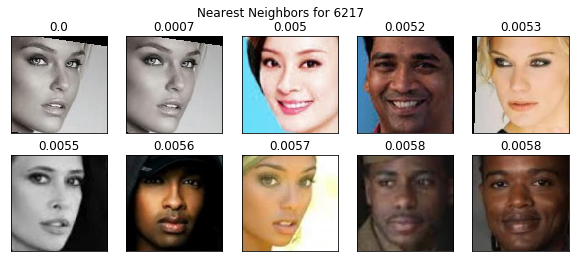

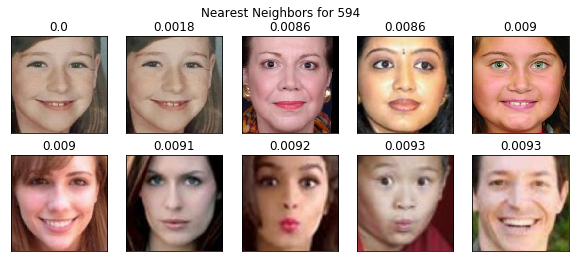

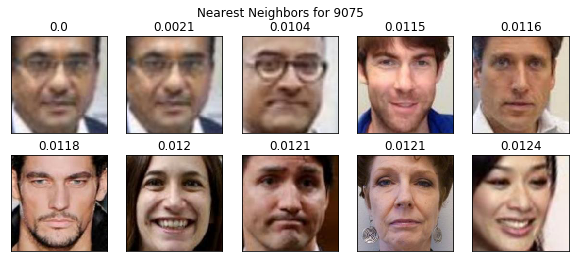

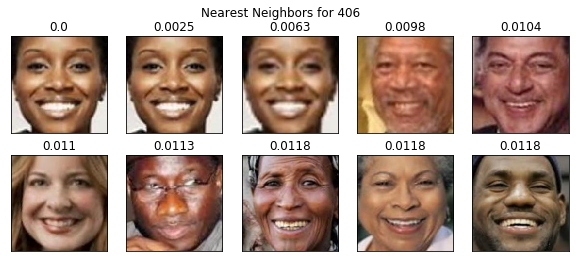

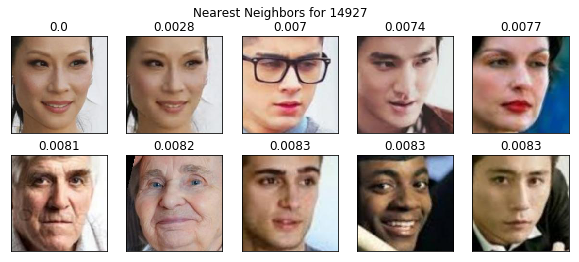

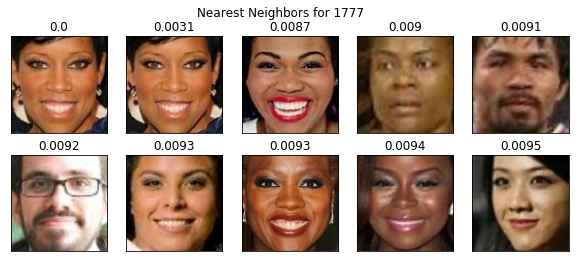

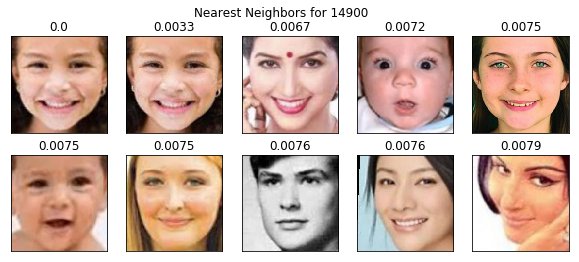

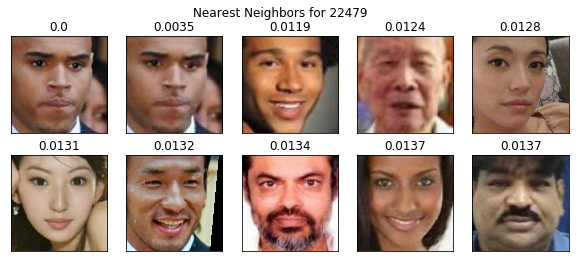

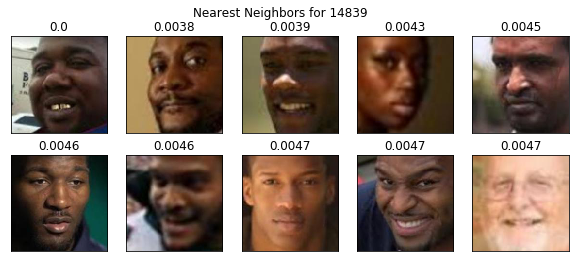

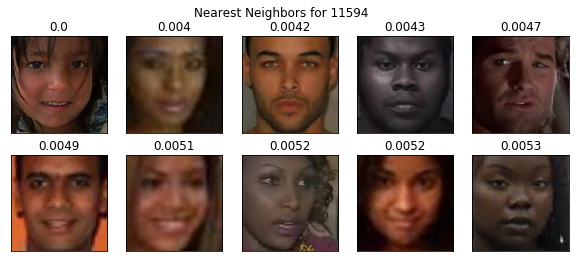

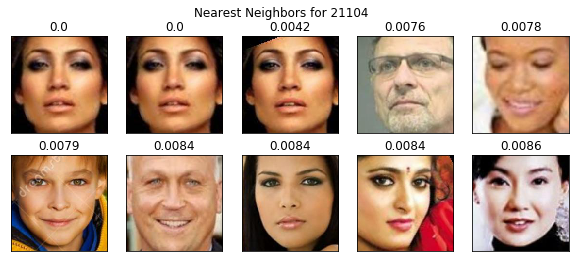

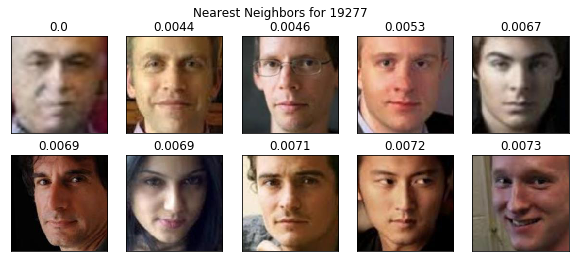

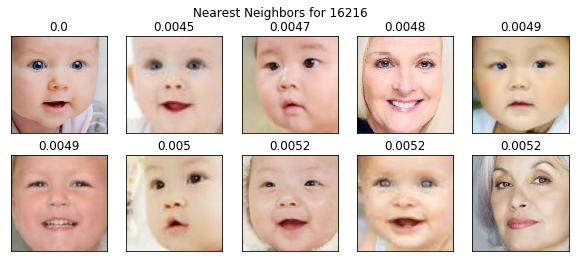

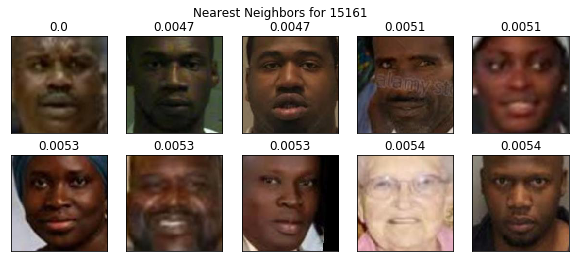

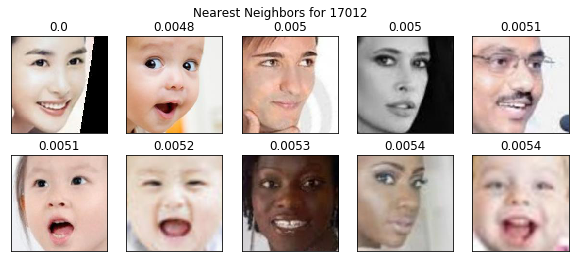

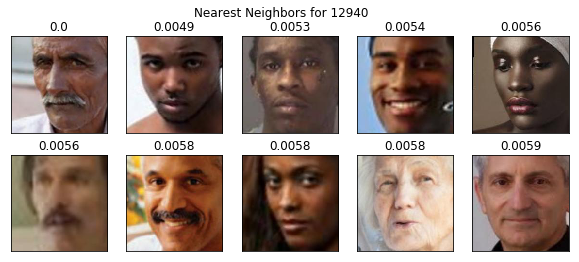

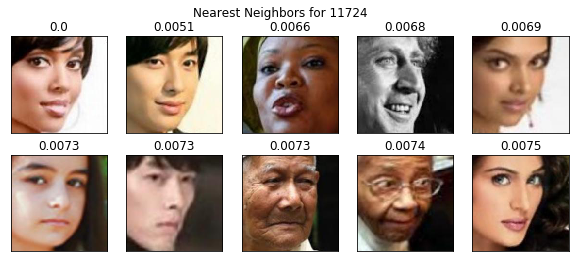

In [42]:
from bias_exp import view_nearest_neighbors
cnt = -1
for i, row in df.sort_values('min_d').iterrows():
    cnt += 1
    if cnt % 100 == 0:
        view_nearest_neighbors(df, i)
    if cnt > 1600:
        break

In [29]:
d_cols = ['d{}'.format(x) for x in range(10)]
np.where(df[d_cols].values==0, 1, df[d_cols].values).min(axis=1)

array([0.00177737, 0.00836872, 0.01347426, ..., 0.00739307, 0.01079201,
       0.00893701])

In [15]:
vgf = VGGFace(include_top=False, model='resnet50', input_shape=(200, 200, 3))
vgf.layers[-1]

In [25]:
arr = np.array([0, 1, 2, 3])
(arr/np.linalg.norm(arr)).sum()

1.6035674514745464